<a href="https://colab.research.google.com/github/EduardoBeppler/LH_CD_EduardoBeppler/blob/main/analise_exploratoria_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Carregar o arquivo CSV
file_path = '/content/drive/MyDrive/Indicium/desafio_indicium_imdb.csv'
data = pd.read_csv(file_path)

# Exibir as primeiras linhas do dataframe e informações gerais
print(data.info())
print("Primeiros filmes")
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross        

In [13]:
# Converter 'Released_Year' para numérico, substituindo possíveis erros por NaN
data['Released_Year'] = pd.to_numeric(data['Released_Year'], errors='coerce')

# Verificar se houve conversão correta e tratar valores nulos, se necessário
print("Released_Year após conversão:", data['Released_Year'].dtype, data['Released_Year'].isnull().sum(), "valores nulos")


Released_Year após conversão: float64 1 valores nulos


In [14]:
# Tratar valores nulos substituindo por 'Not Rated'
data['Certificate'] = data['Certificate'].fillna('Not Rated')

# Verificar se houve substituição correta
print("Certificate após tratamento:", data['Certificate'].isnull().sum(), "valores nulos")


Certificate após tratamento: 0 valores nulos


In [15]:
# Remover 'min' e converter 'Runtime' para numérico
data['Runtime'] = data['Runtime'].str.replace(' min', '')
data['Runtime'] = pd.to_numeric(data['Runtime'], errors='coerce')

# Verificar se houve conversão correta
print("Runtime após conversão:", data['Runtime'].dtype, data['Runtime'].isnull().sum(), "valores nulos")


Runtime após conversão: int64 0 valores nulos


In [16]:
# Tratar valores nulos substituindo pela média
data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].mean())

# Verificar se houve substituição correta
print("Meta_score após tratamento:", data['Meta_score'].isnull().sum(), "valores nulos")


Meta_score após tratamento: 0 valores nulos


In [17]:
# Remover vírgulas e converter 'Gross' para numérico
data['Gross'] = data['Gross'].str.replace(',', '')
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')

# Tratar valores nulos substituindo pela média
data['Gross'] = data['Gross'].fillna(data['Gross'].mean())

# Verificar se houve substituição correta
print("Gross após tratamento:", data['Gross'].isnull().sum(), "valores nulos")


Gross após tratamento: 0 valores nulos


# Passo 3: Análise Exploratória dos Dados (EDA)

<Figure size 1400x800 with 0 Axes>

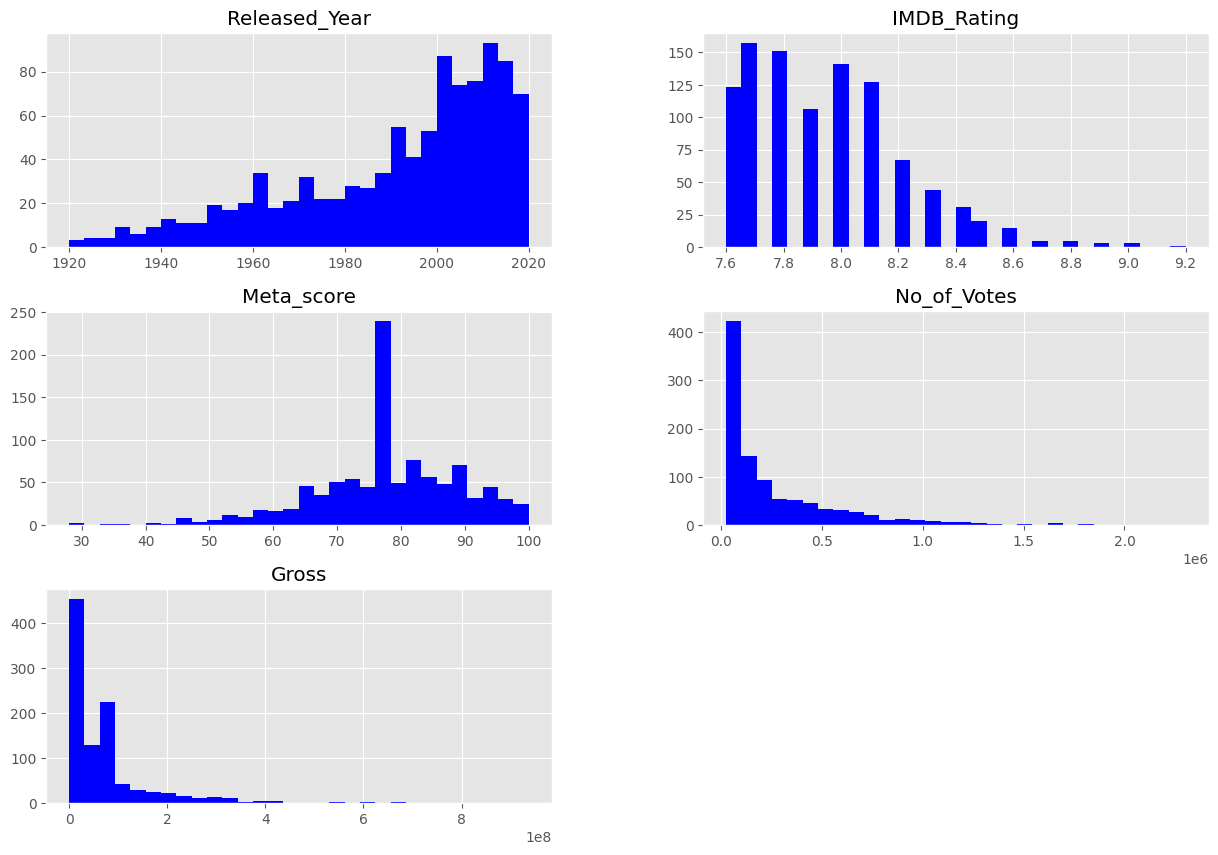

In [29]:
plt.style.use('ggplot')
plt.figure(figsize=(14, 8))
data[['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].hist(bins=30, figsize=(15,10), color='blue')
plt.show()


Distribuição das Variáveis Numéricas

Released_Year: A maioria dos filmes no dataset foram lançados após 1970, com um pico significativo entre 2000 e 2020.

IMDB_Rating: A maioria das notas IMDB está concentrada entre 7.6 e 8.4.

Meta_score: A distribuição das pontuações Meta está concentrada em torno de 70-80.

No_of_Votes: A maioria dos filmes tem menos de 500.000 votos, com poucos filmes recebendo mais de 1 milhão de votos.

Gross: A maioria dos filmes tem um faturamento relativamente baixo, com poucos filmes atingindo altos valores de faturamento.

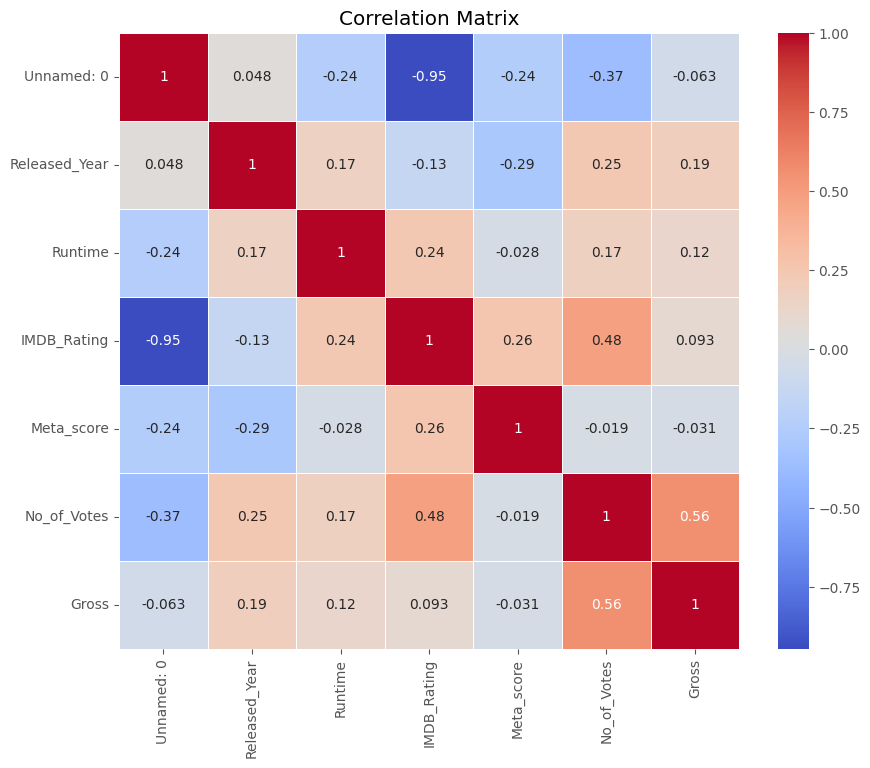

In [20]:
# Selecionar apenas colunas numéricas para calcular a matriz de correlação
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular a matriz de correlação
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Matriz de Correlação

Existe uma correlação moderada entre o número de votos (No_of_Votes) e o faturamento (Gross).

A nota do IMDB (IMDB_Rating) tem uma correlação positiva com o número de votos.
O Meta_score tem uma correlação moderada com a nota do IMDB.

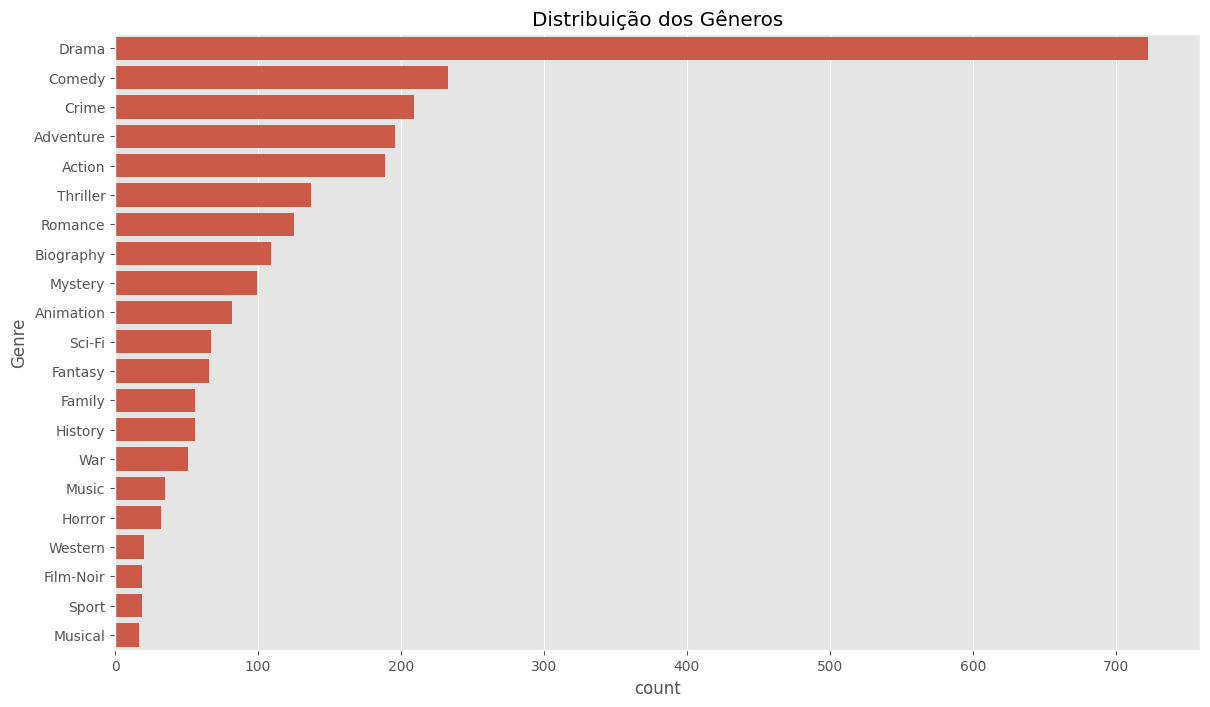

In [25]:
# Separar os gêneros por vírgula e contar individualmente
genre_split = data['Genre'].str.split(', ')
all_genres = genre_split.explode()

# Plotar a distribuição dos gêneros
plt.figure(figsize=(14, 8))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title('Distribuição dos Gêneros')
plt.show()


Distribuição dos Gêneros

Drama é o gênero mais comum, seguido por Comedy, Crime, e Adventure.

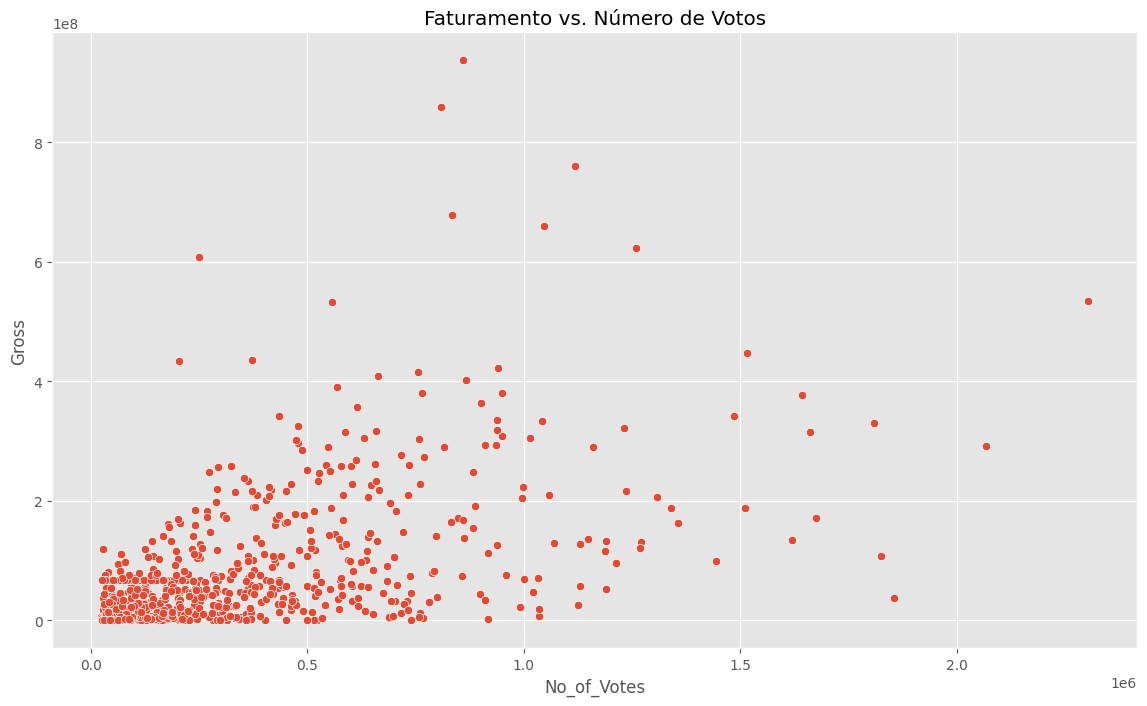

In [26]:
# Análise de Faturamento e Número de Votos
plt.figure(figsize=(14, 8))
sns.scatterplot(x='No_of_Votes', y='Gross', data=data)
plt.title('Faturamento vs. Número de Votos')
plt.show()


Faturamento vs. Número de Votos

Há uma relação positiva entre o número de votos e o faturamento, mas com bastante dispersão.

Respostas às Perguntas
1. Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendar um filme sem conhecer a pessoa, podemos optar por filmes com altas notas no IMDB, muitos votos e alto faturamento. Um exemplo seria "The Dark Knight".

2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Os principais fatores relacionados com alta expectativa de faturamento são:

Número de Votos: Maior número de votos está associado a maior faturamento.

Nota do IMDB: Embora a correlação seja moderada, filmes com notas mais altas tendem a atrair mais público.

Gênero: Gêneros populares como Drama, Comedy, Crime e Adventure tendem a atrair mais público.

3. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Para analisar a coluna Overview e inferir o gênero do filme, podemos usar técnicas de processamento de linguagem natural (NLP).
Um exemplo seria a análise de palavras-chave para identificar temas comuns em cada gênero.
Técnicas como TF-IDF ou Word2Vec poderiam ser usadas para transformar textos em vetores que podem ser utilizados em modelos de classificação.


Previsão da Nota do IMDB

Para prever a nota do IMDB, utilizamos variáveis como Released_Year, Runtime, Meta_score, No_of_Votes, e Gross.
 Como estamos prevendo uma variável contínua (nota do IMDB), estamos lidando com um problema de regressão.
 Utilizamos um modelo de regressão linear devido à sua simplicidade e interpretabilidade.

# 4. Construção do Modelo Preditivo

Para prever a nota do IMDB, seguiremos os passos abaixo:

Seleção de Variáveis

Divisão dos Dados em Treinamento e Teste

Construção e Treinamento do Modelo

Avaliação do Modelo

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Seleção de variáveis
features = data[['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']]
target = data['IMDB_Rating']

# Tratamento de valores nulos
for column in features.columns:
    features[column].fillna(features[column].mean(), inplace=True)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Construção e treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

# Salvando o modelo
joblib.dump(model, 'modelo_imdb.pkl')


Root Mean Squared Error: 0.22072972344310446


<ipython-input-30-7270e71364b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column].fillna(features[column].mean(), inplace=True)


['modelo_imdb.pkl']

# Gerando Previsão


In [31]:
filme = {'Series_Title': 'The Shawshank Redemption',
         'Released_Year': 1994,
         'Certificate': 'A',
         'Runtime': 142,
         'Genre': 'Drama',
         'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
         'Meta_score': 80.0,
         'Director': 'Frank Darabont',
         'Star1': 'Tim Robbins',
         'Star2': 'Morgan Freeman',
         'Star3': 'Bob Gunton',
         'Star4': 'William Sadler',
         'No_of_Votes': 2343110,
         'Gross': 28341469}

# Previsão da nota do IMDB
features_film = [[1994, 142, 80.0, 2343110, 28341469]]
predicted_rating = model.predict(features_film)
print(f'Nota prevista do IMDB para "The Shawshank Redemption": {predicted_rating[0]}')


Nota prevista do IMDB para "The Shawshank Redemption": 9.166206254607143


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
